### Tugas Proyek Data Science

 Nama: Nadea Putri Nur Fauzi

 NIM: 20110031

 Kelas: S1-SD-01A

Hyperparameter Tuning dan Feature Engineering Untuk Meningkatkan Akurasi Model Random Forest Pada Klasifikasi Risiko Kredit

## Data Acquisition

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Sumber Dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [107]:
data = pd.read_csv('/content/drive/My Drive/dataset/CreditRisk.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [108]:
data = data.rename(columns={'person_age': 'Umur','person_income':'Pendapatan','person_home_ownership':'KepemilikanRumah',
                            'person_emp_length':'LamaKerja','loan_intent':'TujuanPeminjaman','loan_grade':'TingkatanPinjaman',
                            'loan_amnt':'JumlahPinjaman','loan_int_rate':'SukuBunga','loan_status':'StatusPinjaman','loan_percent_income':'%Pendapatan',
                            'cb_person_default_on_file':'HistoriPeminjaman','cb_person_cred_hist_length':'JumlahHistoriPeminjaman'})

In [109]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


###Variable Data

Diskrit

a.	Umur: Dalam Tahun

d.	Lama Kerja: Dalam Tahun

g.	Jumlah Pinjaman: Dolar

l.	Jumlah Histori Pinjaman
_____________________________

Kontinu

b.	Pendapatan: Dalam Dolar per Tahun

h.	Suku Bunga:

j.	Persentase Pinjaman:

_____________________________

kategorikal

c.	Kepemilikan Rumah:

e.	Tujuan Peminjaman:

f.	Grade Pinjaman:

i.	Status Pinjaman: KELAS

k.	Histori Pinjaman:

## Data Exploration

In [110]:
data.shape

(32581, 12)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Umur                     32581 non-null  int64  
 1   Pendapatan               32581 non-null  int64  
 2   KepemilikanRumah         32581 non-null  object 
 3   LamaKerja                31686 non-null  float64
 4   TujuanPeminjaman         32581 non-null  object 
 5   TingkatanPinjaman        32581 non-null  object 
 6   JumlahPinjaman           32581 non-null  int64  
 7   SukuBunga                29465 non-null  float64
 8   StatusPinjaman           32581 non-null  int64  
 9   %Pendapatan              32581 non-null  float64
 10  HistoriPeminjaman        32581 non-null  object 
 11  JumlahHistoriPeminjaman  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [112]:
data.describe()

,Umur,Pendapatan,LamaKerja,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,JumlahHistoriPeminjaman
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<ipython-input-113-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

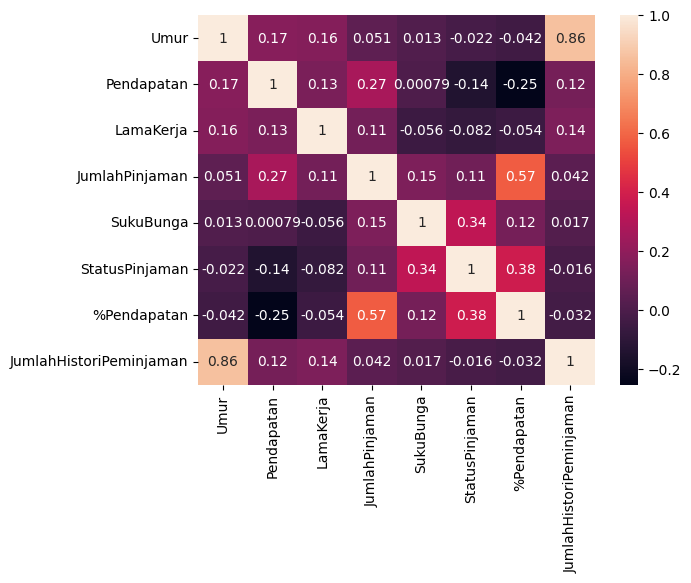

In [113]:
sns.heatmap(data.corr(), annot=True)

In [114]:
data.isnull().sum()

Umur                          0
Pendapatan                    0
KepemilikanRumah              0
LamaKerja                   895
TujuanPeminjaman              0
TingkatanPinjaman             0
JumlahPinjaman                0
SukuBunga                  3116
StatusPinjaman                0
%Pendapatan                   0
HistoriPeminjaman             0
JumlahHistoriPeminjaman       0
dtype: int64

In [115]:
print('Total Duplicated Values in dataframe are {0}'.format(data[data.duplicated()].shape[0]))

Total Duplicated Values in dataframe are 165


Cek Data Kategorikal

In [116]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [117]:
categorical = data[['KepemilikanRumah','TujuanPeminjaman','TingkatanPinjaman','StatusPinjaman','HistoriPeminjaman']]

In [118]:
for column in categorical:
  value_counts = categorical[column].value_counts()
  print(f'Value Counts for column {column}:')
  print(value_counts)
  print('\n')

Value Counts for column KepemilikanRumah:
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: KepemilikanRumah, dtype: int64


Value Counts for column TujuanPeminjaman:
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: TujuanPeminjaman, dtype: int64


Value Counts for column TingkatanPinjaman:
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: TingkatanPinjaman, dtype: int64


Value Counts for column StatusPinjaman:
0    25473
1     7108
Name: StatusPinjaman, dtype: int64


Value Counts for column HistoriPeminjaman:
N    26836
Y     5745
Name: HistoriPeminjaman, dtype: int64




Data Numerik

In [119]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [120]:
numeric = data[['Umur','Pendapatan','LamaKerja','JumlahPinjaman','SukuBunga','%Pendapatan','JumlahHistoriPeminjaman']]

In [121]:
numeric.describe()

,Umur,Pendapatan,LamaKerja,JumlahPinjaman,SukuBunga,%Pendapatan,JumlahHistoriPeminjaman
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


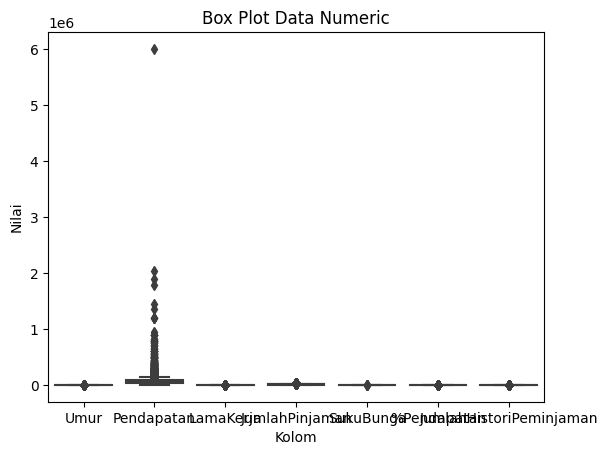

In [122]:
sns.boxplot(data=numeric)
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.title('Box Plot Data Numeric')
plt.show()

In [123]:
def count_outliers(data):
    columns = numeric
    outlier_counts = {}

    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return outlier_counts

outlier_counts = count_outliers(data)
print(f'Jumlah Data Outliers adalah:', outlier_counts)

Jumlah Data Outliers adalah: {'Umur': 1494, 'Pendapatan': 1484, 'LamaKerja': 853, 'JumlahPinjaman': 1689, 'SukuBunga': 6, '%Pendapatan': 651, 'JumlahHistoriPeminjaman': 1142}


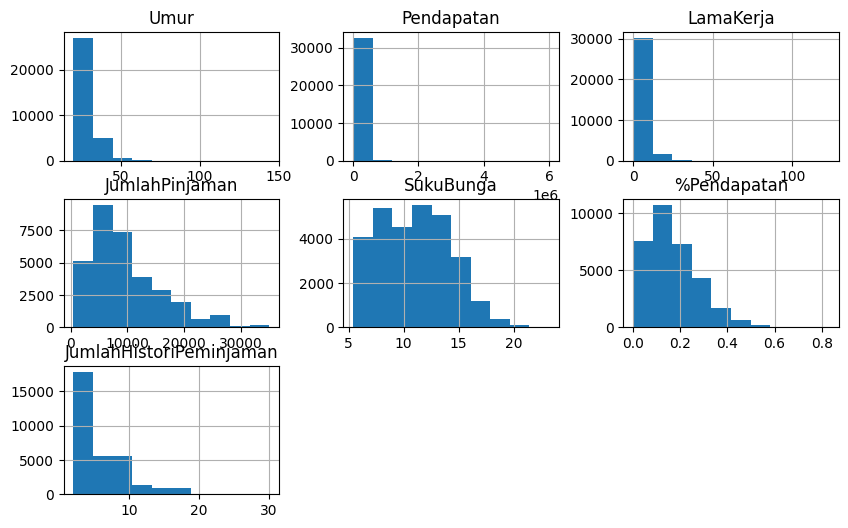

In [124]:
numeric.hist(bins=10, figsize=(10, 6))
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Data')
plt.show()

Data Kelas Target

In [125]:
data['StatusPinjaman'].value_counts()

0    25473
1     7108
Name: StatusPinjaman, dtype: int64

<Axes: xlabel='StatusPinjaman'>

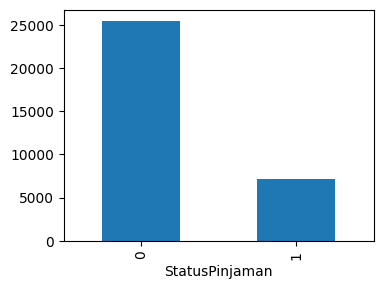

In [126]:
viz=data.groupby('StatusPinjaman').size()
viz.plot(kind='bar', figsize=(4,3))

Dataset tidak balanced (Imbalanced dataset)

Hasil Eksplorasi Data:

1. Data null sejumlah 3116 pada kolom suku bunga dan 895 pada kolom lama kerja

Total Data Null = 4.011

2. Data outliers pada kolom 'Umur': 1494, 'Pendapatan': 1484, 'LamaKerja': 853, 'JumlahPinjaman': 1689, 'SukuBunga': 6, '%Pendapatan': 651 'JumlahHistoriPeminjaman': 1142.

Total Data Outliers = 7319

3. Data imbalanced | 25473 kelas 0 dan 7108 kelas 1.

### Data Cleaning

Data Duplicated

In [127]:
data.drop_duplicates(inplace=True)

In [128]:
data.shape

(32416, 12)

Data Null/Kosong/NaN

In [129]:
mean_SB = data['SukuBunga'].mean()
data['SukuBunga'].fillna(mean_SB, inplace=True)

data.isnull().sum()

Umur                         0
Pendapatan                   0
KepemilikanRumah             0
LamaKerja                  887
TujuanPeminjaman             0
TingkatanPinjaman            0
JumlahPinjaman               0
SukuBunga                    0
StatusPinjaman               0
%Pendapatan                  0
HistoriPeminjaman            0
JumlahHistoriPeminjaman      0
dtype: int64

In [130]:
median_LK = data['LamaKerja'].median()
data['LamaKerja'].fillna(median_LK, inplace=True)

data.isnull().sum()

Umur                       0
Pendapatan                 0
KepemilikanRumah           0
LamaKerja                  0
TujuanPeminjaman           0
TingkatanPinjaman          0
JumlahPinjaman             0
SukuBunga                  0
StatusPinjaman             0
%Pendapatan                0
HistoriPeminjaman          0
JumlahHistoriPeminjaman    0
dtype: int64

Data Kategorikal

In [131]:
categorical.head()

,KepemilikanRumah,TujuanPeminjaman,TingkatanPinjaman,StatusPinjaman,HistoriPeminjaman
0,RENT,PERSONAL,D,1,Y
1,OWN,EDUCATION,B,0,N
2,MORTGAGE,MEDICAL,C,1,N
3,RENT,MEDICAL,C,1,N
4,RENT,MEDICAL,C,1,Y


In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
LE = [LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]

data['KepemilikanRumah'] = LE[0].fit_transform(data['KepemilikanRumah'])
data['TujuanPeminjaman'] = LE[1].fit_transform(data['TujuanPeminjaman'])
data['TingkatanPinjaman'] = LE[2].fit_transform(data['TingkatanPinjaman'])
data['StatusPinjaman'] = LE[3].fit_transform(data['StatusPinjaman'])
data['HistoriPeminjaman'] = LE[4].fit_transform(data['HistoriPeminjaman'])
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


<Axes: >

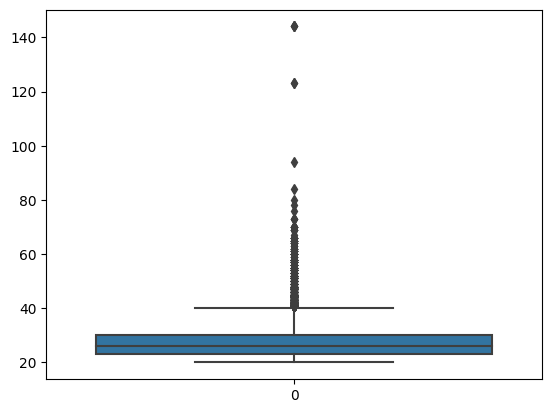

In [134]:
sns.boxplot(data=data['Umur'])

<Axes: >

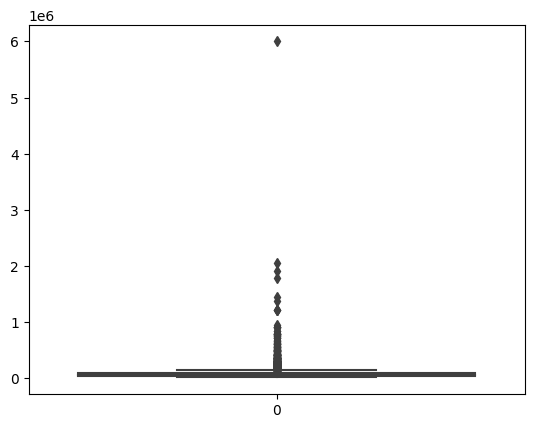

In [135]:
sns.boxplot(data=data['Pendapatan'])

In [136]:
filtered_data = data.loc[data['Pendapatan'] == 6000000]
filtered_data

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
32297,144,6000000,0,12.0,4,2,5000,12.73,0,0.0,0,25


akan didrop

<Axes: >

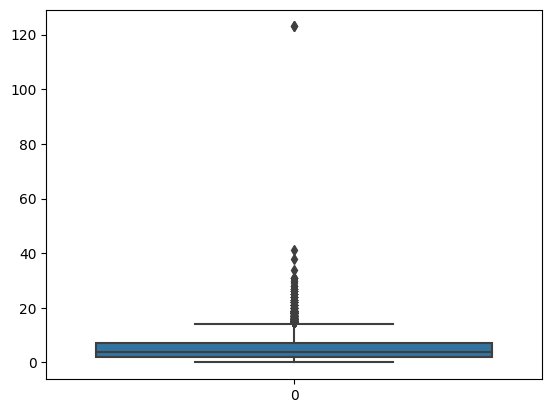

In [137]:
sns.boxplot(data=data['LamaKerja'])

In [138]:
filtered_data1 = data.loc[data['LamaKerja'] >= 100]
filtered_data1

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
210,21,192000,0,123.0,5,0,20000,6.54,0,0.10,0,4


akan didrop

<Axes: >

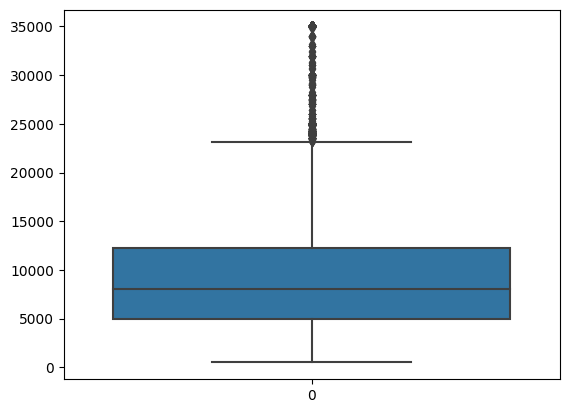

In [139]:
sns.boxplot(data=data['JumlahPinjaman'])

tidak didrop

<Axes: >

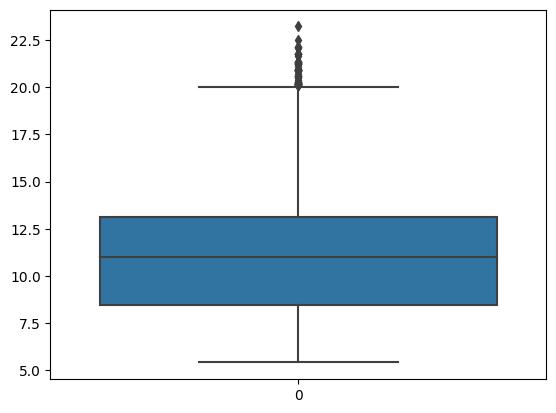

In [140]:
sns.boxplot(data=data['SukuBunga'])

In [144]:
data = data.drop(data[(data['Umur'] >= 100) | (data['Pendapatan'] >= 6000000) | (data['LamaKerja'] >= 100)].index)

In [145]:
data.shape

(32409, 12)

In [146]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2


## Feature Engineering

Drop Feature

In [151]:
data = data.drop(['HistoriPeminjaman', '%Pendapatan'], axis=1)

In [152]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,JumlahHistoriPeminjaman
1,21,9600,2,5.0,1,1,1000,11.14,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,3
3,23,65500,3,4.0,3,2,35000,15.23,1,2
4,24,54400,3,8.0,3,2,35000,14.27,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,2


In [153]:
data.shape

(32409, 10)

### Normalisasi

In [154]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [155]:
scaler = RobustScaler()
norm_cols = ['Pendapatan', 'JumlahPinjaman', 'SukuBunga','Umur']
data[norm_cols] = scaler.fit_transform(data[norm_cols])

data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,JumlahHistoriPeminjaman
1,-0.714286,-1.115479,2,5.0,1,1,-0.965517,0.026566,0,2
2,-0.142857,-1.115479,0,1.0,3,2,-0.344828,0.401025,1,3
3,-0.428571,0.257985,3,4.0,3,2,3.724138,0.911847,1,2
4,-0.285714,-0.014742,3,8.0,3,2,3.724138,0.704055,1,4
5,-0.714286,-1.108108,2,2.0,5,0,-0.758621,-0.839235,1,2


## Pre Modelling

In [156]:
x = data.drop(columns='StatusPinjaman')
y = data['StatusPinjaman']

In [157]:
x.shape, y.shape

((32409, 9), (32409,))

In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x,y ,train_size=0.75)

In [171]:
x_train.shape,x_test.shape

((24306, 9), (8103, 9))

## Modelling

### Random Forest Algorithm

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Dilakukan tuning parameter dengan melihat 4 parameter berikut:

In [160]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [161]:
rf_model = RandomForestClassifier()

In [162]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [163]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy found:  0.9263145896058514


Best parameter yang didapat yaitu:  'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

In [164]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9287918055041343


Hasil akurasi mencapai 92.3% yang artinya model yang dibuat sudah sangat baik.

In [166]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9289152165864495


In [176]:
from sklearn import tree

best_model = best_model.estimators_[0]

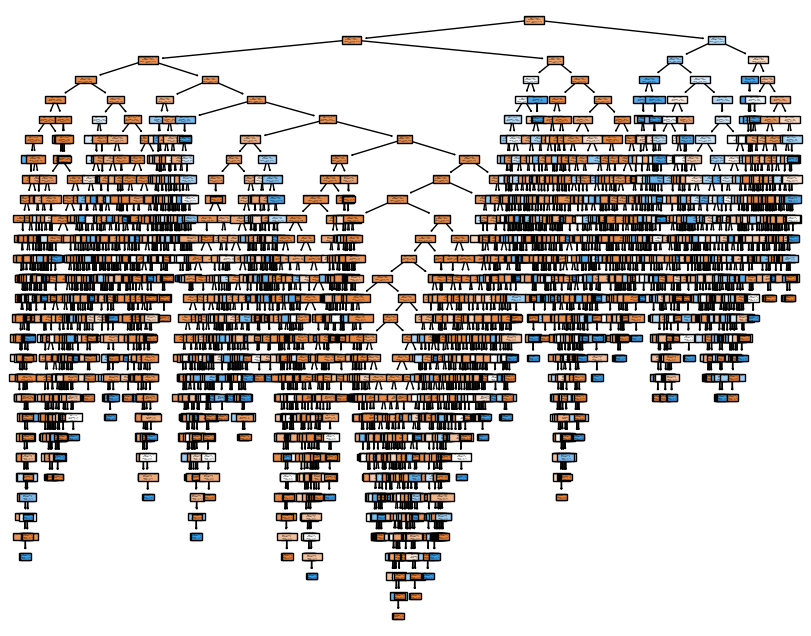

In [177]:
plt.figure(figsize=(10, 8))
tree.plot_tree(best_model,
               feature_names=x.columns,
               class_names=['0','1'],
               filled=True,
               precision=3)
plt.show()

In [169]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred,y_test)

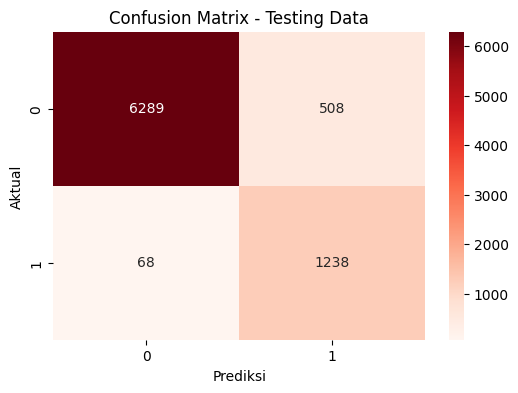

In [170]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt ='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [179]:
from sklearn.metrics import classification_report
cr = classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6797
           1       0.71      0.95      0.81      1306

    accuracy                           0.93      8103
   macro avg       0.85      0.94      0.88      8103
weighted avg       0.94      0.93      0.93      8103



Untuk melihat model Random Forest ini, maka yang diperhatikan adalah nilai f1-scorenya.

In [178]:
import pickle

with open('modelRF.pkl','wb') as f:
    pickle.dump(best_model,f)

In [180]:
with open('modelRF.pkl','wb') as f:
    pickle.dump(best_model,f)

In [181]:
filename = 'crc_trained.sav'
pickle.dump(best_model,open(filename,'wb'))

Predict

In [182]:
input_data = (25, 145000000, 2, 1,2,3,500000,11.14,2)

id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = best_model.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Credit Status: Tidak Bermasalah")
else:
    print("Credit Status: Bermasalah")

[0.]
Credit Status: Tidak Bermasalah
